### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

### Import Libraries and Define Notebook Settings

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# display all dataframe columns in the notebook
pd.options.display.max_columns = None

# set figure size
plt.rcParams['figure.figsize'] = (8, 6)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
df = pd.read_csv('data/coupons.csv')

In [4]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
# check for duplicates
df[df.duplicated()].shape

(74, 26)

74 rows are duplicates. Since there is no unique person identifier included in the data, duplicates in the survey seem possible. Hence, we will not exclude them.

In [6]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

- We have 12684 rows and 26 columns.
- 18 columns are of type object, and 8 columns are of type integer.
- There are missing values in some columns. We will explore them next.

Text(0.5, 1.0, 'Percentage of missing values per column')

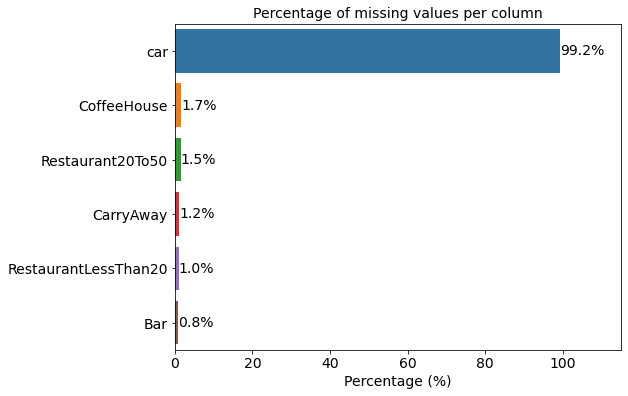

In [7]:
# calculate the percentage of missing values per column
nan_count = df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False)
nan_count_perc = round(nan_count*100./df.shape[0],2)

# plot the percentage of missing values per column
nan_perc_barplot = sns.barplot(x=nan_count_perc, y=nan_count_perc.index)
plt.bar_label(nan_perc_barplot.containers[0], fmt='%.1f%%', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(0,115)
plt.xlabel('Percentage (%)', fontsize=14)
plt.title('Percentage of missing values per column', fontsize=14)

The `car`-column has more than 99% missing values. The other five columns have less than 2% missing values each.

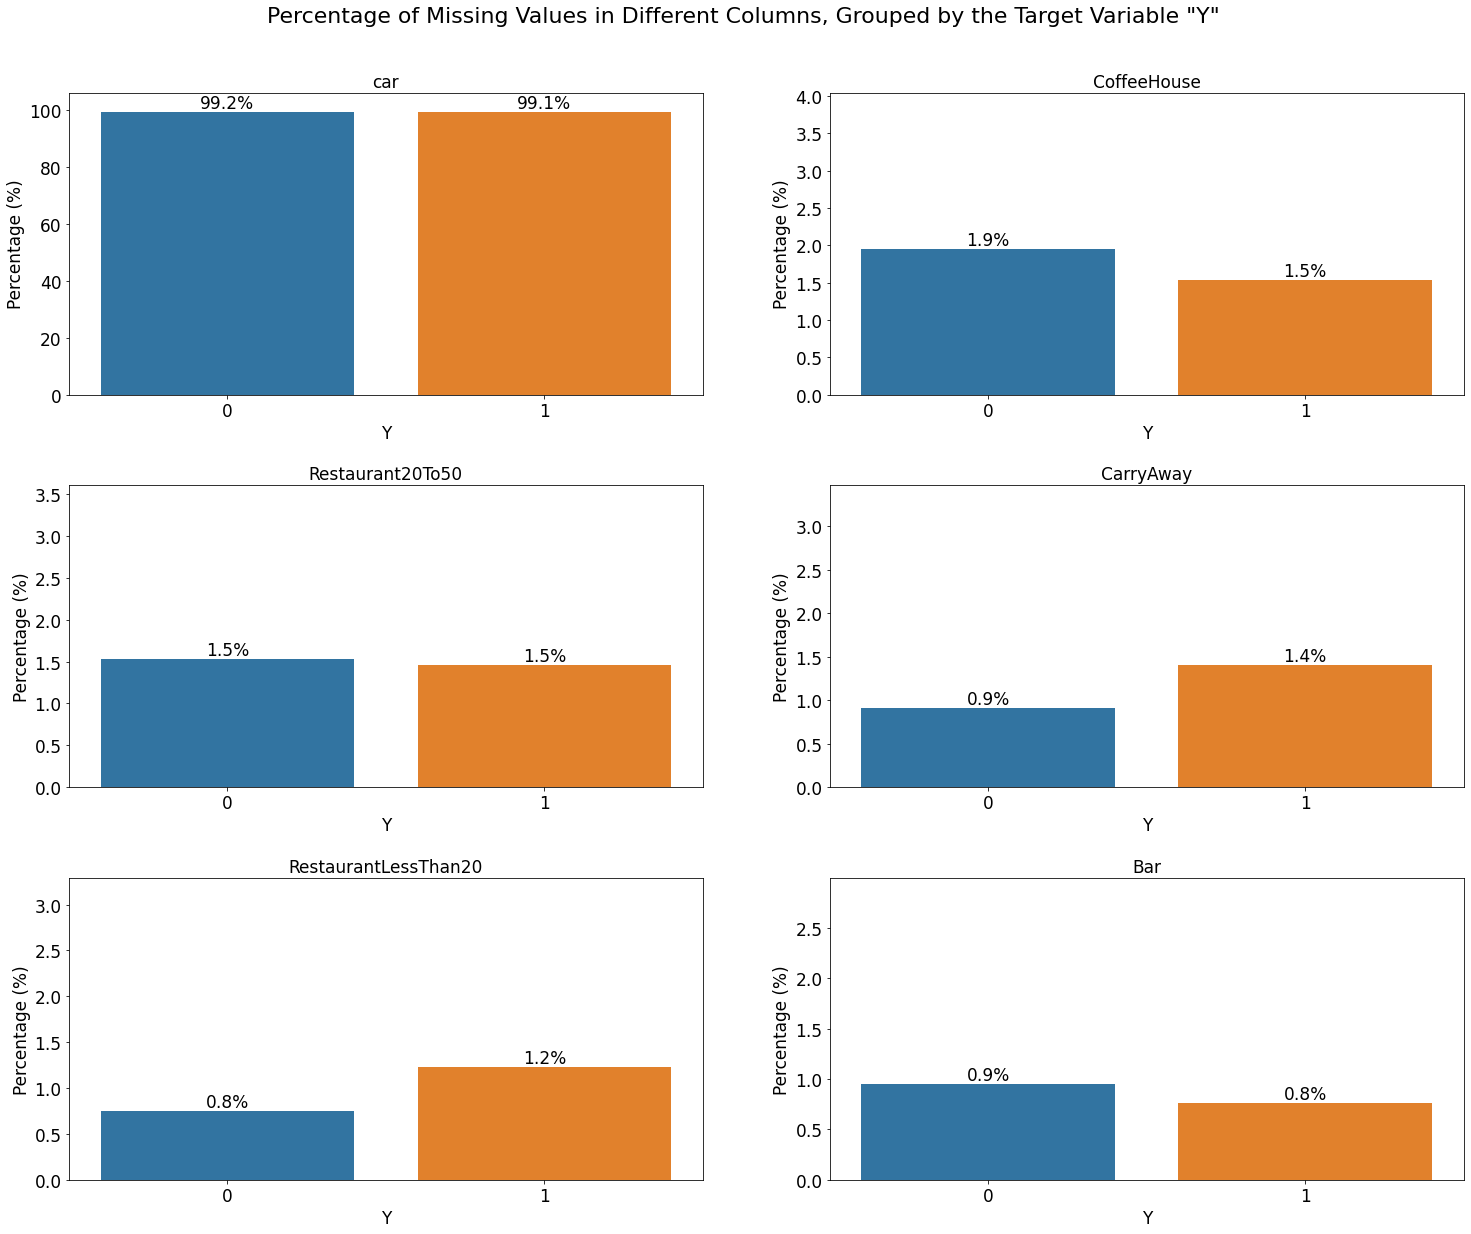

In [8]:
# calculate the percentage of missing values per column, grouped by the "Y"-variable

Y_size = df.groupby('Y').size()
i=1
n_cols = 2

plt.figure(figsize=(25,20))
plt.suptitle('Percentage of Missing Values in Different Columns, Grouped by the Target Variable "Y"',fontsize=22,y=0.94)

for col in nan_count.index:
    nan_count_groupby_Y = df[df[col].isna()].groupby('Y').size()
    nan_count_groupby_Y_perc = round(nan_count_groupby_Y*100./Y_size,2)
    
    # plot the percentage of missing values per column, grouped by the "Y"-variable
    ax = plt.subplot(int(len(nan_count)/n_cols), n_cols, i)
    nan_groupby_Y_perc_barplot = sns.barplot(y=nan_count_groupby_Y_perc, x=nan_count_groupby_Y_perc.index)
    plt.bar_label(nan_groupby_Y_perc_barplot.containers[0], fmt='%.1f%%', fontsize=17)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)
    plt.xlabel('Y', fontsize=17)
    plt.ylabel('Percentage (%)', fontsize=17)
    plt.title(col, fontsize=17)
    bottom, upper = ax.get_ylim()
    ax.set_ylim(bottom, upper+2)
    plt.subplots_adjust(hspace=0.3)
    i=i+1

Missing values appear in both `Y`-categories.

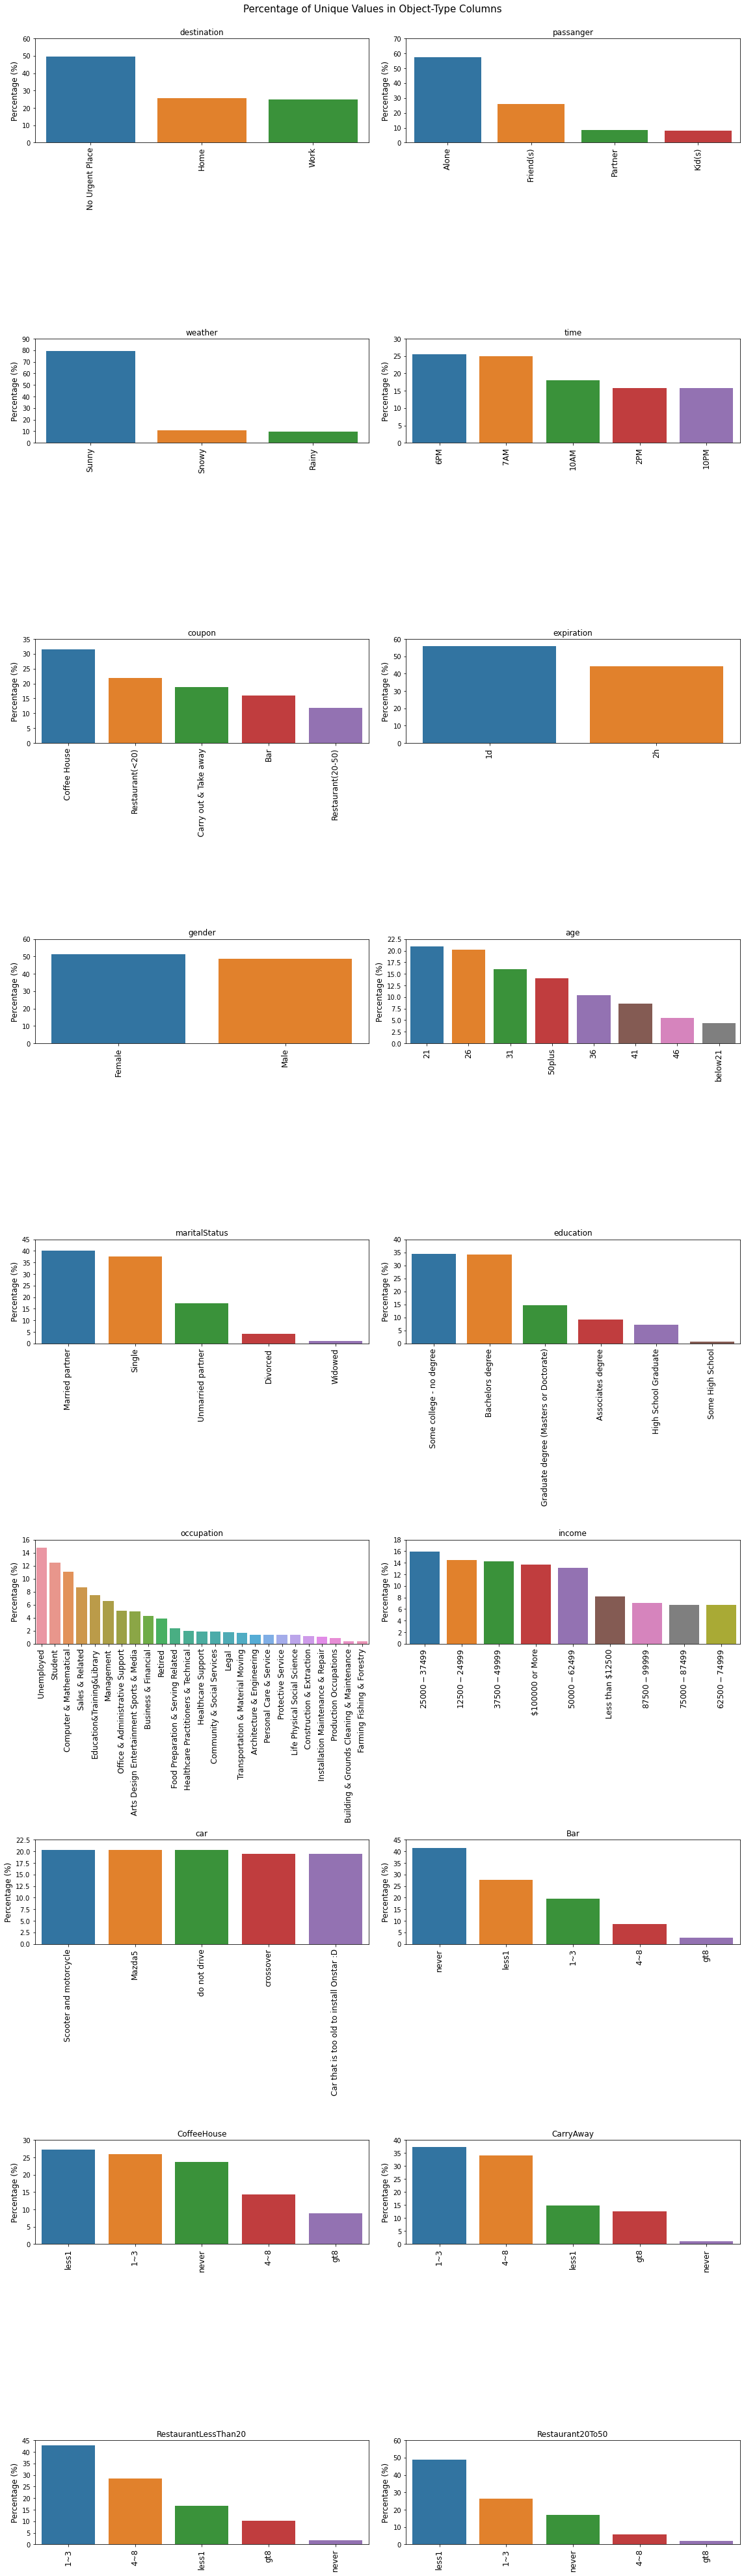

In [9]:
# check the object-type variables for structural errors

i=0
n_cols = 2

fig, ax = plt.subplots(round(len(df.select_dtypes(include='object').columns)/n_cols), n_cols, figsize=(16,55))
fig.suptitle('Percentage of Unique Values in Object-Type Columns', fontsize=15, y=1.)

# calculate and plot the percentage of unique values in object-type columns
for col in df.select_dtypes(include='object').columns:
    df_col = df[col].value_counts(normalize=True).mul(100).rename('Percentage (%)').reset_index()
 
    g = sns.barplot(x='index', y='Percentage (%)', data=df_col, ax=ax[i//n_cols,i%n_cols])
    
    g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='center', fontsize = 12)

    g.set_xticks(g.get_xticks(), fontsize = 12)
    g.set_yticks(g.get_yticks(), fontsize = 12)
    g.set_title(col, fontsize=12)
    g.set_xlabel('')
    g.set_ylabel('Percentage (%)', fontsize = 12)
    
    ## add percentages as text
    #for container in g.containers:
    #    g.bar_label(container, fmt='%.1f%%', fontsize=12)
    #bottom, upper = g.get_ylim()
    #g.set_ylim(bottom, upper+2)
    #plt.subplots_adjust(hspace=2.5)
    
    ## split long x-labels
    #max_chars = 20
    #new_labels = ['\n'.join(label._text[i:i + max_chars ] 
    #                        for i in range(0, len(label._text), max_chars ))
    #              for label in g.get_xticklabels()]
    #g.set_xticklabels(new_labels, rotation=90, horizontalalignment='center', fontsize = 12)
    
    i=i+1
    
fig.tight_layout()

The object-type variables are all categorical variables with unique categories. No potential structural errors are present.

In [10]:
# descriptive statistics on the integer-type variables
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


- There are no drivers with more than 1 children.
- The `toCoupon_GEQ5min` value is `1` for all drivers. That means, all the restaurant/bars/coffee houses/etc. are at least five minutes away from the driver. We can drop this column as it has no contribution to the problem. 

In [11]:
# drop the column "toCoupon_GEQ5min"
df_clean = df.drop(columns=['toCoupon_GEQ5min'])
df_clean.shape

(12684, 25)

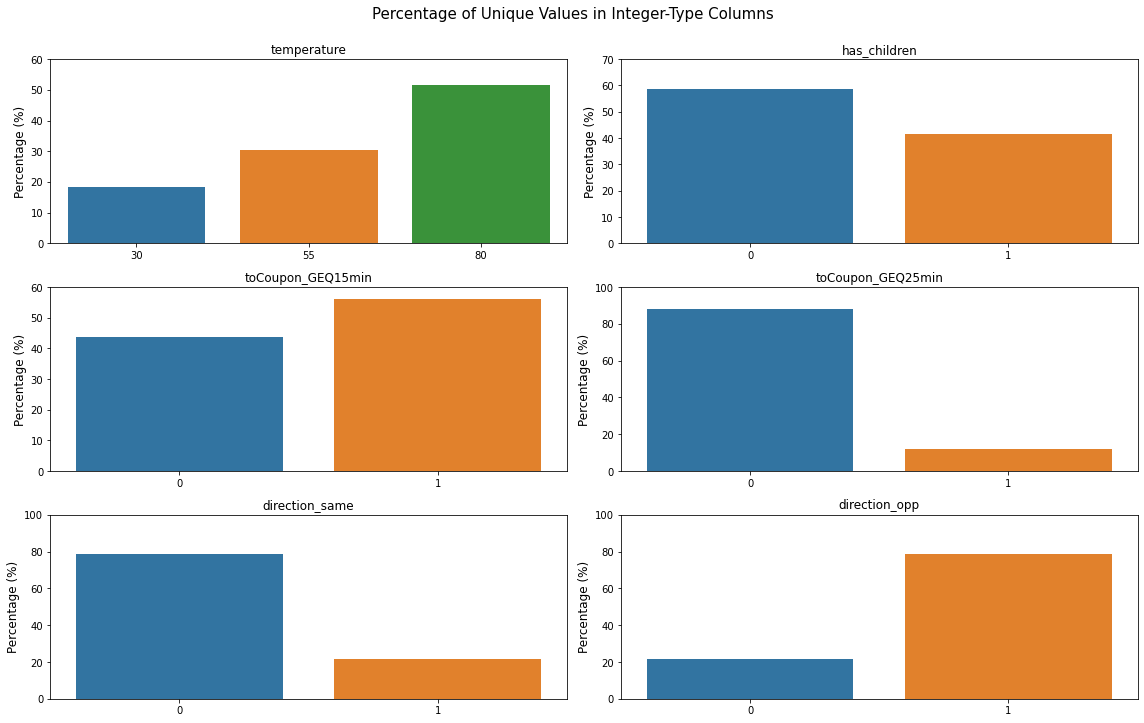

In [12]:
# check the integer-type variables for structural errors

i=0
n_cols = 2

# remove the "Y"-variable from the columns to look at
int_cols = list(df_clean.select_dtypes(include='number').columns)
int_cols.remove('Y')

fig, ax = plt.subplots(round(len(int_cols)/n_cols), n_cols, figsize=(16,10))
fig.suptitle('Percentage of Unique Values in Integer-Type Columns', fontsize=15, y=1.)

# calculate and plot the percentage of unique values in integer-type columns
for col in int_cols:
    df_col = df_clean[col].value_counts(normalize=True).mul(100).rename('Percentage (%)').reset_index()
 
    g = sns.barplot(x='index', y='Percentage (%)', data=df_col, ax=ax[i//n_cols,i%n_cols])
    
    g.set_xticks(g.get_xticks(), fontsize = 12)
    g.set_yticks(g.get_yticks(), fontsize = 12)
    g.set_title(col, fontsize=12)
    g.set_xlabel('')
    g.set_ylabel('Percentage (%)', fontsize = 12)
    
    ## add percentages as text
    #for container in g.containers:
    #    g.bar_label(container, fmt='%.1f%%', fontsize=12)
    #bottom, upper = g.get_ylim()
    #g.set_ylim(bottom, upper+2)
    #plt.subplots_adjust(hspace=2.5)
    
    i=i+1
    
fig.tight_layout()

The integer-type variables all have two to three unique values. No potential structural errors are present.

We can simplify the data:
- The column `direction_opp` is the opposite of the column `direction_same`. Hence, we will drop it.
- The columns `toCoupon_GEQ15min` and `toCoupon_GEQ25min` have both the unique values `0` and `1`. We will combine the two columns into one column.

In [13]:
# drop the column "direction_opp"
df_clean.drop(columns=['direction_opp'], inplace=True)
df_clean.shape

(12684, 24)

In [14]:
# Next we want to combine the columns "toCoupon_GEQ15min" and "toCoupon_GEQ25min".
# First, we check whether the combination "(toCoupon_GEQ15min = 0) & (toCoupon_GEQ25min = 1)" exists.
# Logically, it should not exist.
df_clean[(df_clean['toCoupon_GEQ15min']==0) & (df_clean['toCoupon_GEQ25min']==1)]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y


The combination `(toCoupon_GEQ15min = 0) & (toCoupon_GEQ25min = 1)` does not exist.

In [15]:
# combine the columns "toCoupon_GEQ15min" and "toCoupon_GEQ25min" into one column called "driving_distance" as follows:
#  - if (toCoupon_GEQ15min = 0) & (toCoupon_GEQ25min = 0) ---> greater than 5 minutes and less than or equal than 15 minutes
#  - if (toCoupon_GEQ15min = 0) & (toCoupon_GEQ25min = 1) ---> does not exist
#  - if (toCoupon_GEQ15min = 1) & (toCoupon_GEQ25min = 0) ---> greater than 15 minutes and less than or equal than 25 minutes
#  - if (toCoupon_GEQ15min = 1) & (toCoupon_GEQ25min = 1) ---> greater than 15 minutes
df_clean['driving_distance'] = None
df_clean['driving_distance'] = np.where((df_clean['toCoupon_GEQ15min'] == 0) & (df_clean['toCoupon_GEQ25min'] == 0), 
                                  '5 to 15 min', df_clean['driving_distance'])
df_clean['driving_distance'] = np.where((df_clean['toCoupon_GEQ15min'] == 1) & (df_clean['toCoupon_GEQ25min'] == 0), 
                                  '15 to 25 min', df_clean['driving_distance'])
df_clean['driving_distance'] = np.where((df_clean['toCoupon_GEQ15min'] == 1) & (df_clean['toCoupon_GEQ25min'] == 1), 
                                  'more than 15 min', df_clean['driving_distance'])
df_clean['driving_distance'].value_counts()

15 to 25 min        5611
5 to 15 min         5562
more than 15 min    1511
Name: driving_distance, dtype: int64

In [16]:
# After combining, we can drop the columns "toCoupon_GEQ15min" and "toCoupon_GEQ25min".
df_clean.drop(columns=['toCoupon_GEQ15min', 'toCoupon_GEQ25min'], inplace=True)
df_clean.shape

(12684, 23)

3. Decide what to do about your missing data -- drop, replace, other...

Since the `car`-column has more than 99% missing values, we drop it.

In [17]:
# drop the column "car"
df_clean.drop(columns=['car'], inplace=True)
df_clean.shape

(12684, 22)

The other five columns `CoffeeHouse`, `Restaurant20To50`, `CarryAway`, `RestaurantLessThan20`, and `Bar` have less than 2% missing values each.
 
We will impute these missing values by replacing them with the most common class. Since the most common class can be different for the two `Y`-categories, we impute the missing values separately for the two groups.

In [18]:
# impute missing values in the "Y=0" group
df_clean_Yzero = df_clean[df_clean['Y']==0].apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean_Yzero.shape

(5474, 22)

In [19]:
# confirm that missing values have been removed in the "Y=0" group
df_clean_Yzero.isna().sum().sum()

0

In [20]:
# impute missing values in the "Y=1" group
df_clean_Yone = df_clean[df_clean['Y']==1].apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean_Yone.shape

(7210, 22)

In [21]:
# confirm that missing values have been removed in the "Y=1" group
df_clean_Yone.isna().sum().sum()

0

In [22]:
# combine the two cleaned dataframes
df_clean = df_clean_Yzero.append(df_clean_Yone)
df_clean.shape

(12684, 22)

In [23]:
# confirm that missing values have been removed in the combined dataframe
df_clean.isna().sum().sum()

0

4. What proportion of the total observations chose to accept the coupon? 



Text(0.5, 1.0, 'Proportion of accepted coupons\n')

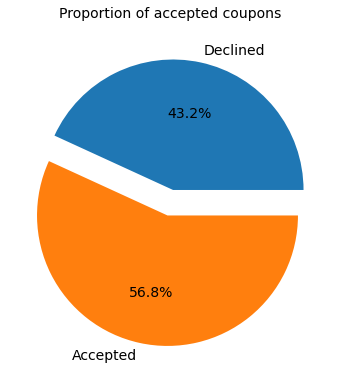

In [24]:
# calculate and plot the proportion of accepted coupons

df_clean['Y'].value_counts().sort_index().plot(kind='pie', autopct="%.1f%%", explode=[0.1,0.1], 
                                               labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Proportion of accepted coupons\n', fontsize=14)

56.8% of the total observations chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

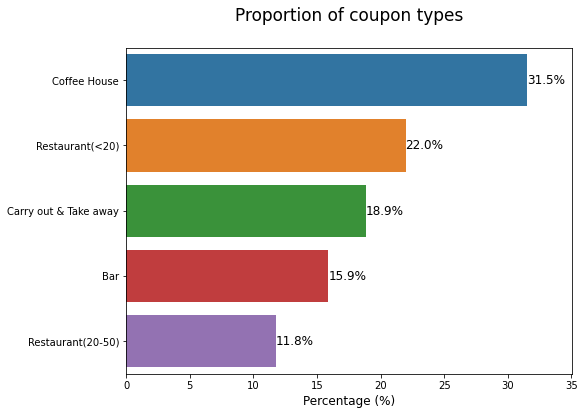

In [25]:
# calculate and plot the proportion of coupon types
df_col = df_clean['coupon'].value_counts(normalize=True).mul(100).rename('Percentage (%)').reset_index()
 
g = sns.barplot(y='index', x='Percentage (%)', orient="h", 
                data=df_col.sort_values('Percentage (%)', ascending=False))
left, right = g.get_xlim()
g.set_xlim(left,right+2)
g.set_ylabel('')
g.set_title('Proportion of coupon types\n', fontsize=17)
g.set_xlabel('Percentage (%)', fontsize = 12)

# add the percentages as text to the bars
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%', fontsize=12)

There are 5 types of coupons. The coupon `Coffee House` has the highest occurance, whereas the coupon `Restaurant(20-50)` has the lowest occurance.

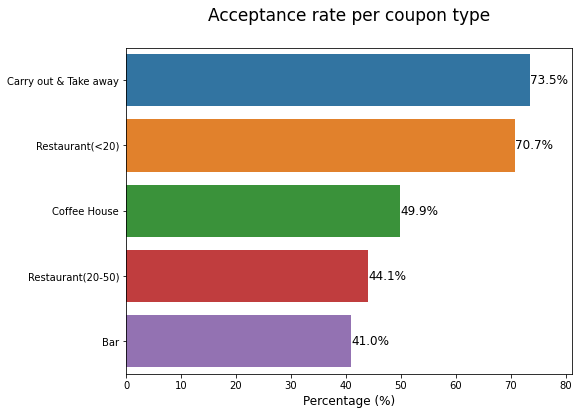

In [26]:
# calculate and plot the acceptance rate per coupon type
groupby_col = df_clean.groupby('coupon')['Y'].value_counts(normalize=True).mul(100).rename('Percentage (%)').reset_index()
 
g = sns.barplot(y='coupon', x='Percentage (%)', orient="h", 
                data=groupby_col[groupby_col['Y']==1].sort_values('Percentage (%)', ascending=False))
left, right = g.get_xlim()
g.set_xlim(left,right+4)
g.set_ylabel('')
g.set_title('Acceptance rate per coupon type\n', fontsize=17)
g.set_xlabel('Percentage (%)', fontsize = 12)

# add the percentages as text to the bars
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%', fontsize=12)

The coupon `Carry out & Take away` has the highest acceptance rate, closely followed by the coupon `Restaurant(<20)`.

The coupon `Bar` has the highest decline rate, closely followed by the coupon `Restaurant(20-50)`.

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Percent'>

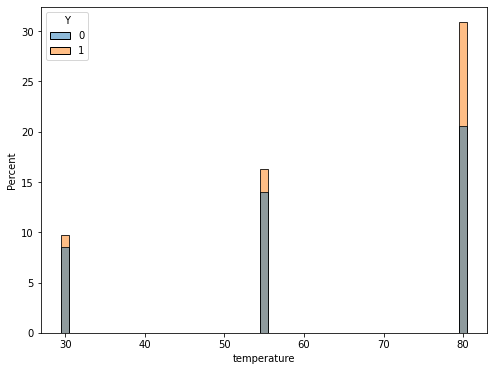

In [27]:
sns.histplot(data=df_clean, x='temperature', hue='Y', discrete=True, stat='percent')

The `temperature` `80F` has the highest occurance, followed by `55F`, and then by `30F`.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [28]:
df_bar_coupon = df_clean[df_clean['coupon']=='Bar'].copy()
df_bar_coupon.shape

(2017, 22)

In [29]:
df_bar_coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y,driving_distance
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,15 to 25 min
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,more than 15 min
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,0,0,5 to 15 min
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,5 to 15 min
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,0,0,more than 15 min


2. What proportion of bar coupons were accepted?


Text(0.5, 1.0, 'Proportion of accepted bar coupons\n')

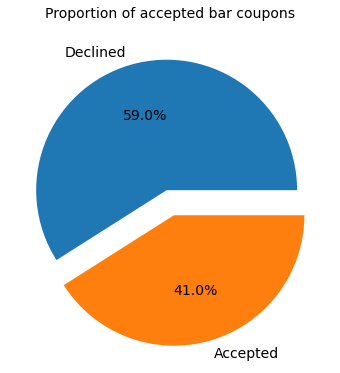

In [30]:
# calculate and plot the proportion of accepted bar coupons

df_bar_coupon['Y'].value_counts().sort_index().plot(kind='pie', autopct="%.1f%%", explode=[0.1,0.1],
                                                    labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Proportion of accepted bar coupons\n', fontsize=14)

41% of the bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Text(0.5, 1.0, 'Acceptance Rates Between Different Groups of Drivers')

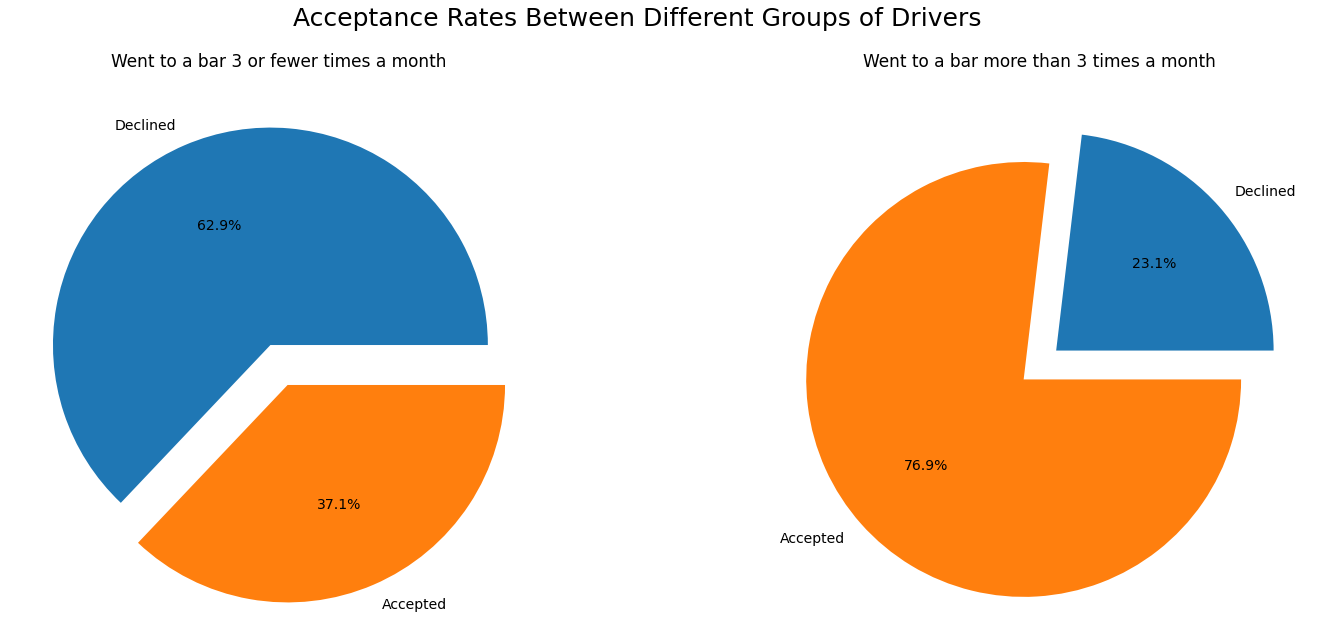

In [31]:
plt.figure(figsize=(25,10))

# calculate and plot the acceptance rate among drivers who went to a bar 3 or fewer times a month
plt.subplot(121)
df_bar_coupon[df_bar_coupon['Bar'].isin(['never', '1~3', 'less1'])]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Went to a bar 3 or fewer times a month\n', fontsize=17)

# calculate and plot the acceptance rate among those who went more
plt.subplot(122)
df_bar_coupon[~(df_bar_coupon['Bar'].isin(['never', '1~3', 'less1']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Went to a bar more than 3 times a month\n', fontsize=17)

plt.suptitle('Acceptance Rates Between Different Groups of Drivers',fontsize=25,y=1.)

The acceptance rate among drivers who went to a bar 3 or fewer times a month is only 37.1%, whereas the acceptance rate among drivers who went to a bar more than 3 times a month is 76.9%.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0.5, 1.0, 'Acceptance Rates Between Different Groups of Drivers')

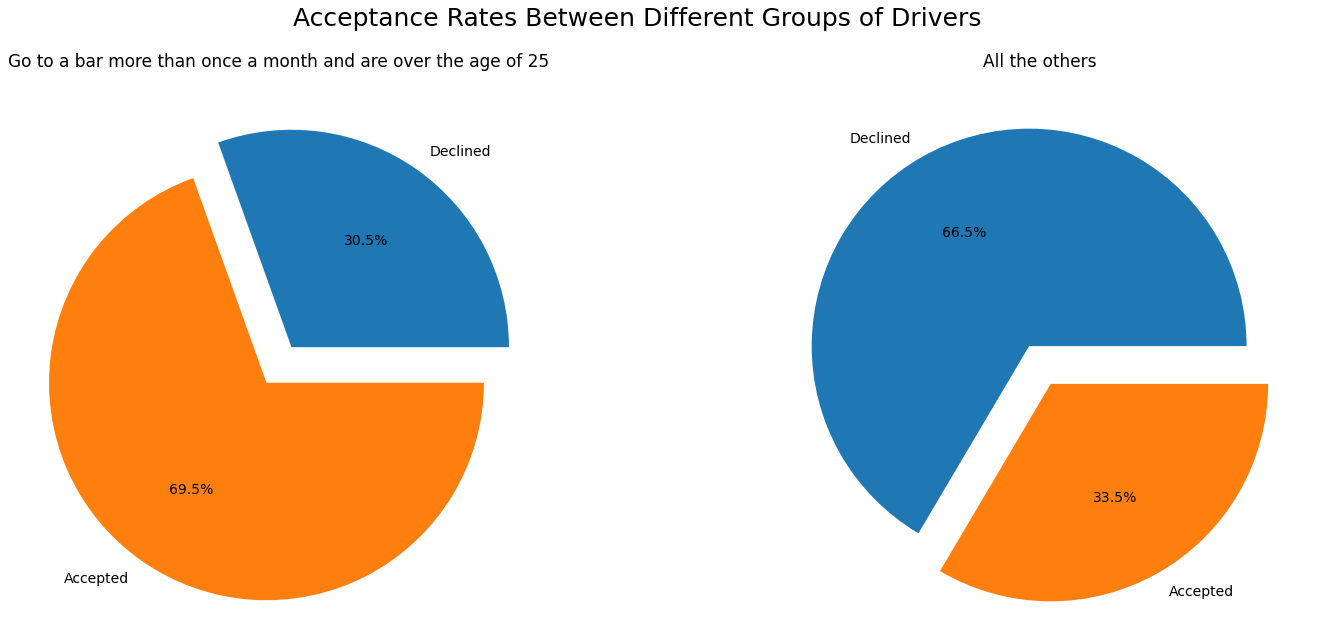

In [32]:
plt.figure(figsize=(25,10))

# calculate and plot the acceptance rate among drivers who go to a bar more than once a month and are over the age of 25
plt.subplot(121)
df_bar_coupon[(df_bar_coupon['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
              (df_bar_coupon['age'].isin(['46', '26', '31', '41', '50plus', '36']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Go to a bar more than once a month and are over the age of 25\n', fontsize=17)

# calculate and plot the acceptance rate among all the others
plt.subplot(122)
df_bar_coupon[~((df_bar_coupon['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
              (df_bar_coupon['age'].isin(['46', '26', '31', '41', '50plus', '36'])))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('All the others\n', fontsize=17)

plt.suptitle('Acceptance Rates Between Different Groups of Drivers',fontsize=25,y=1.)

The acceptance rate among drivers who go to a bar more than once a month and are over the age of 25 is 69.5%, whereas the acceptance rate among all the others is only 33.5%.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Text(0.5, 1.06, 'Acceptance Rates Between Different Groups of Drivers')

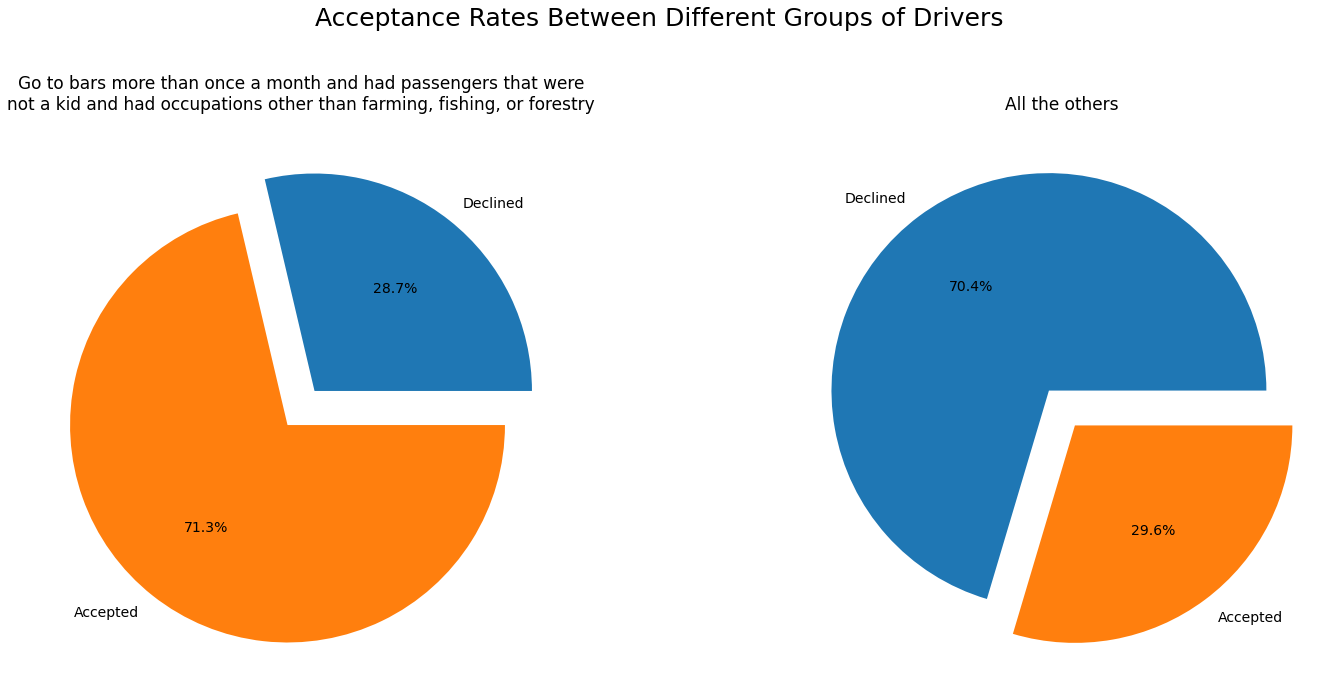

In [33]:
plt.figure(figsize=(25,10))

# calculate and plot the acceptance rate among drivers who go to bars more than once a month and 
# had passengers that were not a kid and had occupations other than farming, fishing, or forestry
plt.subplot(121)
df_bar_coupon[(df_bar_coupon['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
              (~df_bar_coupon['passanger'].isin(['Kid(s)'])) &
              (~df_bar_coupon['occupation'].isin(['Farming Fishing & Forestry']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Go to bars more than once a month and had passengers that were\nnot a kid and had occupations other than farming, fishing, or forestry\n', fontsize=17)

# calculate and plot the acceptance rate among all the others
plt.subplot(122)
df_bar_coupon[~((df_bar_coupon['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
              (~df_bar_coupon['passanger'].isin(['Kid(s)'])) &
              (~df_bar_coupon['occupation'].isin(['Farming Fishing & Forestry'])))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('All the others\n', fontsize=17)

plt.suptitle('Acceptance Rates Between Different Groups of Drivers',fontsize=25,y=1.06)

The acceptance rate among drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 71.3%, whereas the acceptance rate among all the others is only 29.6%.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Text(0.5, 0.98, 'Acceptance Rates Between Different Groups of Drivers')

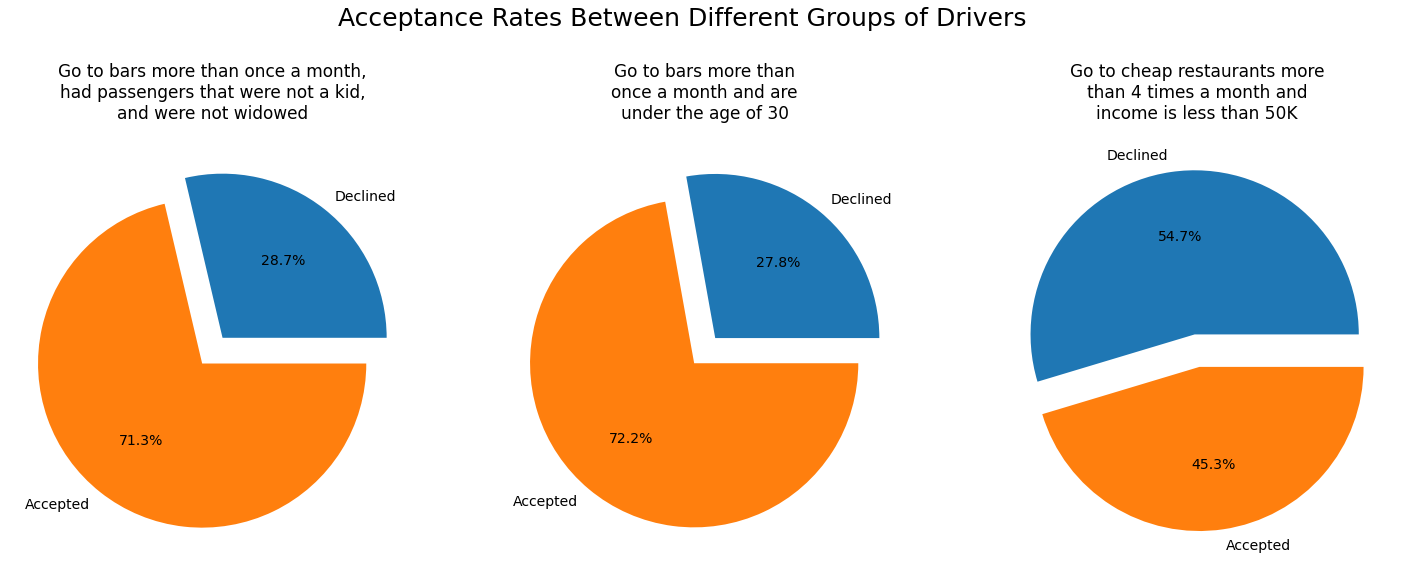

In [34]:
plt.figure(figsize=(25,10))

# calculate and plot the acceptance rate among drivers who go to bars more than once a month, 
# had passengers that were not a kid, and were not widowed
plt.subplot(131)
df_bar_coupon[(df_bar_coupon['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
              (~df_bar_coupon['passanger'].isin(['Kid(s)'])) &
              (~df_bar_coupon['maritalStatus'].isin(['Widowed']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Go to bars more than once a month,\nhad passengers that were not a kid,\nand were not widowed\n', fontsize=17)

# calculate and plot the acceptance rate among drivers who go to bars more than once a month and are under the age of 30
plt.subplot(132)
df_bar_coupon[(df_bar_coupon['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
              (df_bar_coupon['age'].isin(['21', '26', 'below21']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Go to bars more than\nonce a month and are\nunder the age of 30\n', fontsize=17)

# calculate and plot the acceptance rate among drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
plt.subplot(133)
df_bar_coupon[(df_bar_coupon['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
              (df_bar_coupon['income'].isin(['$37500 - $49999', '$12500 - $24999','$25000 - $37499', 
                                             'Less than $12500']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Go to cheap restaurants more\nthan 4 times a month and\nincome is less than 50K\n', fontsize=17)

plt.suptitle('Acceptance Rates Between Different Groups of Drivers',fontsize=25)

The acceptance rates are:
- 71.3% among drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
- 72.2% among drivers who go to bars more than once a month and are under the age of 30
- 45.3% among drivers who go to cheap restaurants more than 4 times a month and income is less than 50K

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who accepted the bar coupons do very likely go to a bar more than 3 times a month.

Drivers who accepted the bar coupons do likely go to a bar more than once a month. Among this group, drivers who are not with a kid in the car are more likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the Coffee House Coupons**

1. Create a new `DataFrame` that contains just the coffee house coupons.

In [35]:
df_coffee_coupon = df_clean[df_clean['coupon']=='Coffee House'].copy()
df_coffee_coupon.shape

(3996, 22)

2. What proportion of coffee house coupons were accepted?

Text(0.5, 1.0, 'Proportion of accepted coffee house coupons\n')

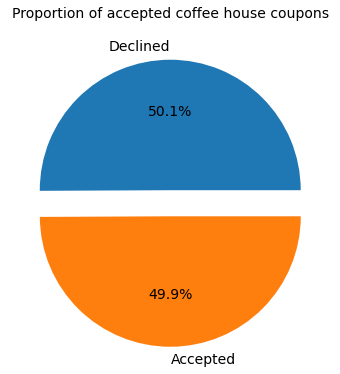

In [36]:
# calculate and plot the proportion of accepted coffee house coupons

df_coffee_coupon['Y'].value_counts().sort_index().plot(kind='pie', autopct="%.1f%%", explode=[0.1,0.1],
                                                    labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Proportion of accepted coffee house coupons\n', fontsize=14)

49.9% of coffee house coupons were accepted.

3. Compare the acceptance rate between those who go to a coffee house less than once month and those who go more.

Text(0.5, 1.02, 'Acceptance Rates Between Different Groups of Drivers')

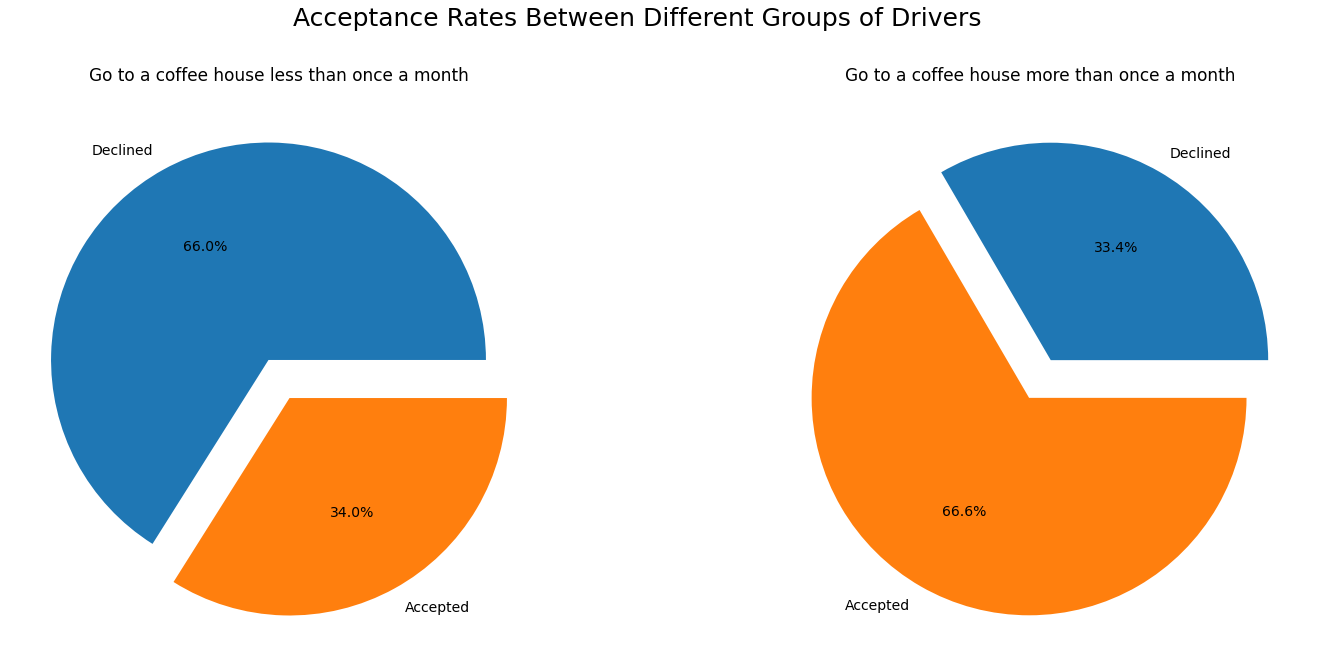

In [37]:
plt.figure(figsize=(25,10))

# calculate and plot the acceptance rate among drivers who go to a coffee house less than once month
plt.subplot(121)
df_coffee_coupon[df_coffee_coupon['CoffeeHouse'].isin(['never', 'less1'])]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Go to a coffee house less than once a month\n', fontsize=17)

# calculate and plot the acceptance rate among drivers who go to a coffee house more than once month
plt.subplot(122)
df_coffee_coupon[~(df_coffee_coupon['CoffeeHouse'].isin(['never', 'less1']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Go to a coffee house more than once a month\n', fontsize=17)

plt.suptitle('Acceptance Rates Between Different Groups of Drivers',fontsize=25,y=1.02)

The acceptance rate among drivers who go to a coffee house less than once a month is only 34%, whereas the acceptance rate among drivers who go to a coffee house more than once a month is 66.6%.

4. Among drivers who go to a coffee house, compare the acceptance rates between different age groups. Is there a difference?

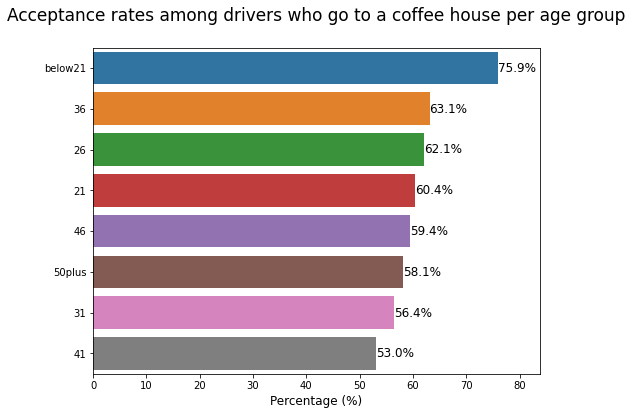

In [38]:
# calculate and plot the acceptance rate among drivers who go to a coffee house per age group
groupby_col = df_coffee_coupon[~df_coffee_coupon['CoffeeHouse'].isin(['never'])].groupby('age')['Y'].value_counts(normalize=True).mul(100).rename('Percentage (%)').reset_index()
 
g = sns.barplot(y='age', x='Percentage (%)', orient="h", 
                data=groupby_col[groupby_col['Y']==1].sort_values('Percentage (%)', ascending=False))
left, right = g.get_xlim()
g.set_xlim(left,right+4)
g.set_ylabel('')
g.set_title('Acceptance rates among drivers who go to a coffee house per age group\n', fontsize=17)
g.set_xlabel('Percentage (%)', fontsize = 12)

# add the percentages as text to the bars
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%', fontsize=12)

Among drivers who go to a coffee house, those below the age of 21 have the highest acceptance rate of 75.9%, whereas those of age 41 have the lowest acceptance rate of 53%.

5. Among drivers who go to a coffee house, compare the acceptance rate between drivers who had passengers that were not a kid to the all others.

Text(0.5, 1.02, 'Acceptance Rates Between Different Groups of Drivers Who Go to a Coffee House')

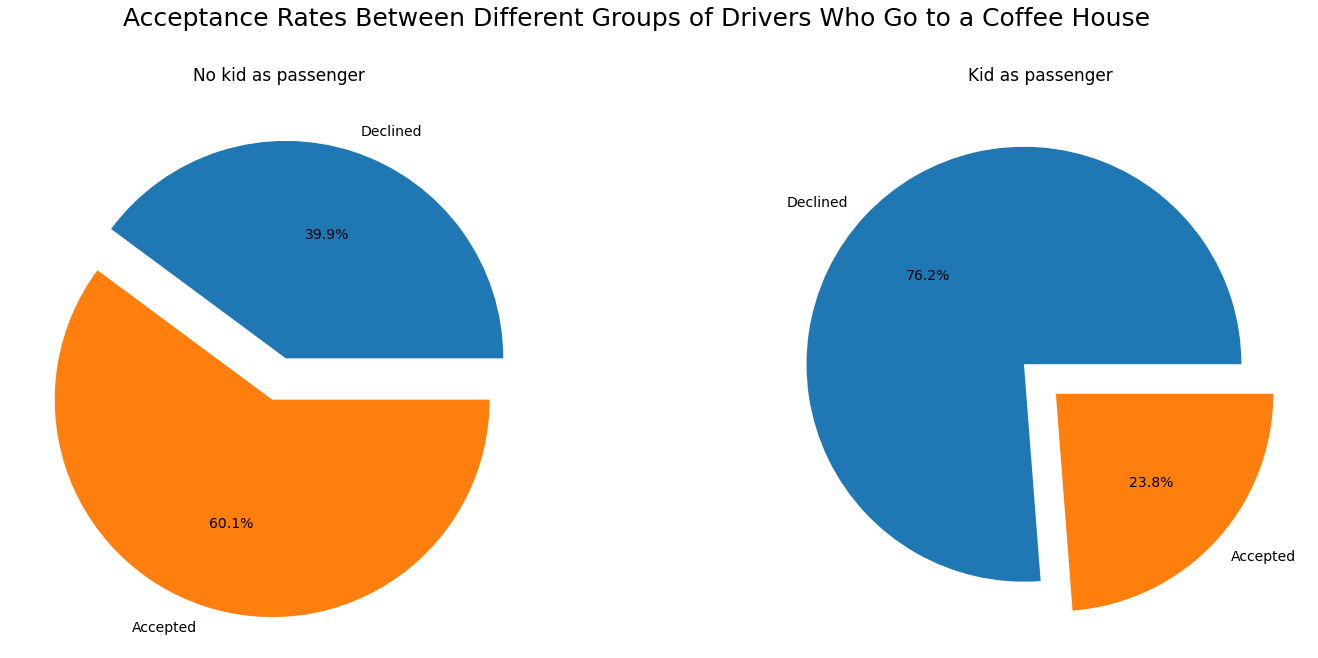

In [39]:
plt.figure(figsize=(25,10))

# no kid as passenger
plt.subplot(121)
df_coffee_coupon[(~df_coffee_coupon['CoffeeHouse'].isin(['never'])) & 
                 (~df_coffee_coupon['passanger'].isin(['Kid(s)']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('No kid as passenger\n', fontsize=17)

# kid as passenger
plt.subplot(122)
df_coffee_coupon[~((~df_coffee_coupon['CoffeeHouse'].isin(['never'])) & 
                 (~df_coffee_coupon['passanger'].isin(['Kid(s)'])))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Kid as passenger\n', fontsize=17)

plt.suptitle('Acceptance Rates Between Different Groups of Drivers Who Go to a Coffee House',fontsize=25,y=1.02)

Among drivers who go to a coffee house, the acceptance rate for those who had passengers that were not a kid is 60.1%, whereas the acceptance rate among those who had a kid as passenger is only 23.8%.

6. Compare the acceptance rates between those drivers who:
- go to a coffee house more than once a month and for whom the coffee house of the coupon is in the same direction as their current destination
- head to work under snowy weather OR
- are students driving at 10AM or 2PM

Text(0.5, 0.98, 'Acceptance Rates Between Different Groups of Drivers')

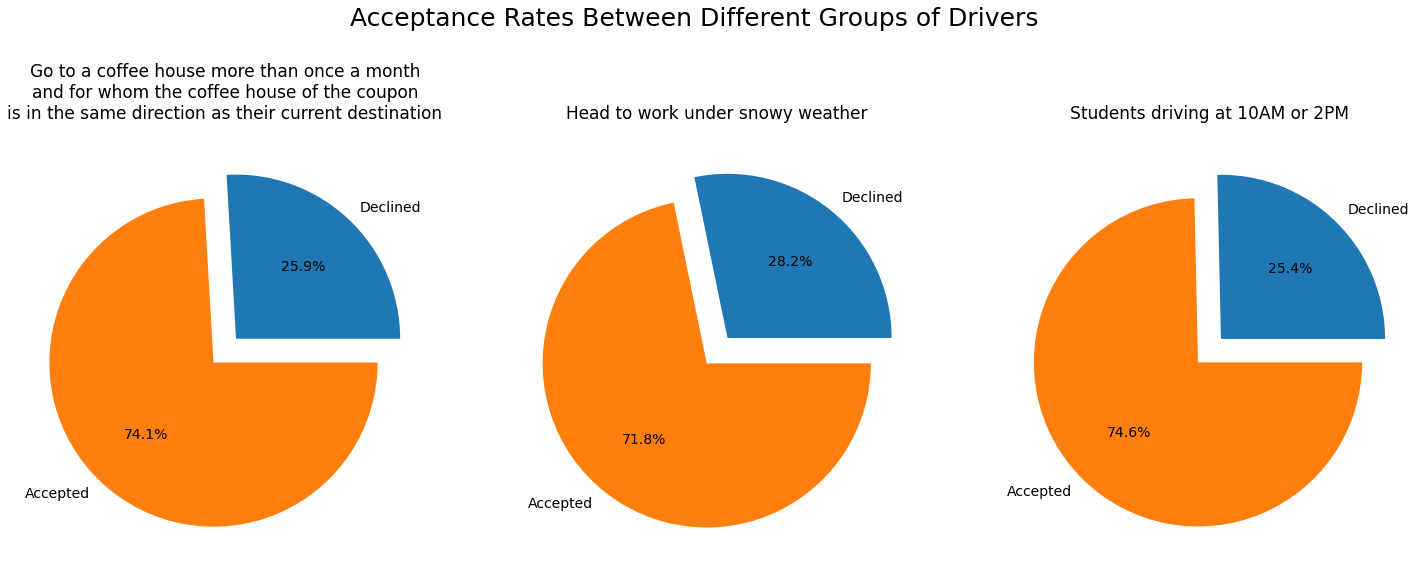

In [40]:
plt.figure(figsize=(25,10))

# group 1
plt.subplot(131)
df_coffee_coupon[(df_coffee_coupon['CoffeeHouse'].isin(['1~3', 'gt8', '4~8'])) & 
              (df_coffee_coupon['direction_same']==1)]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Go to a coffee house more than once a month\nand for whom the coffee house of the coupon\nis in the same direction as their current destination\n', fontsize=17)

# group 2
plt.subplot(132)
df_coffee_coupon[(df_coffee_coupon['destination'].isin(['Work'])) &
                (df_coffee_coupon['weather'].isin(['Snowy']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Head to work under snowy weather\n', fontsize=17)

# group 3
plt.subplot(133)
df_coffee_coupon[(df_coffee_coupon['occupation'].isin(['Student'])) &
                (df_coffee_coupon['time'].isin(['10AM','2PM']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Students driving at 10AM or 2PM\n', fontsize=17)

plt.suptitle('Acceptance Rates Between Different Groups of Drivers',fontsize=25)

The acceptance rates are:
- 74.1% among drivers who go to a coffee house more than once a month and for whom the coffee house of the coupon is in the same direction as their current destination
- 71.8% among drivers who head to work under snowy weather
- 74.6% among drivers who are students driving at 10AM or 2PM

7. Based on these observations, what do you hypothesize about drivers who accepted the coffee house coupons?

Drivers who accepted the coffee house coupons do likely go to a coffee house more than once a month. Among this group, drivers below the age of 21 OR drivers for whom the coffee house of the coupon is in the same direction as their current destination are more likely to accept coffee house coupons.

Drivers who accepted the coffee house coupons do likely go to a coffee house and are not with a kid in the car.
Students driving at 10AM or 2PM are very likely to accept the coffee house coupons, and so are drivers who head to work under snowy weather.